<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> Taller 2: Estudio Comparativo de Clasificadores con Python </h1>
    <h1> Sebastián Acevedo /  </h1>
    <h1> Sebastián Sánchez / 201504022-2 </h1>
    <h2> Fecha: Junio 2019 </h2>
</center>    

---
## Librerías y modulos

In [71]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 

In [2]:
# Leer datos
data = pd.read_csv("bank-additional.csv",sep=";") 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


---
## Discretización de datos categóricos y conjuntos de entrenamiento / testing 


In [51]:
# Transformar datos categóricos

enc=OrdinalEncoder()
enc.fit(data)
OrdinalEncoder(categories='auto')
data=enc.transform(data)

In [47]:
# Dividir datos en entrenamiento y testeo
y = data[:,-1]
X = data[:,:-1]
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

---
## Clasificador Linear Discriminant Analysis

In [52]:
# LDA
clasificador1 = LinearDiscriminantAnalysis()
clasificador1.fit(X_entrenamiento,y_entrenamiento)
y_pred1 = clasificador1.predict(X_test)

In [66]:
# El recall de la clase positiva es sensitivity
# El recall de la clase negativa es specificity
target_names = ['no', 'yes']
print(classification_report(y_test, y_pred1, target_names=target_names))
print("Accuracy: " + str(accuracy_score(y_test, y_pred1))+"\n")
print("Error: ", 1-accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.94      0.94      0.94      1114
         yes       0.47      0.46      0.47       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.71      0.70      0.70      1236
weighted avg       0.89      0.90      0.90      1236

Accuracy: 0.8964401294498382

Error:  0.1035598705501618


[[1052   62]
 [  66   56]]


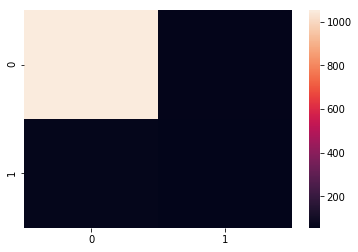

In [73]:
# Matriz de confusion
print(confusion_matrix(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test, y_pred1));

---
## Clasificador Quadratic Discriminant Analysis

In [79]:
# QDA
clasificador2 = QuadraticDiscriminantAnalysis()
clasificador2.fit(X_entrenamiento,y_entrenamiento)
y_pred2 = clasificador2.predict(X_test)

In [80]:
# El recall de la clase positiva es sensitivity
# El recall de la clase negativa es specificity
target_names = ['no', 'yes']
print(classification_report(y_test, y_pred2, target_names=target_names))
print("Accuracy: " + str(accuracy_score(y_test, y_pred2))+"\n")
print("Error: ", 1-accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

          no       0.94      0.92      0.93      1114
         yes       0.37      0.43      0.40       122

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.66      0.68      0.66      1236
weighted avg       0.88      0.87      0.88      1236

Accuracy: 0.872168284789644

Error:  0.12783171521035597


[[1025   89]
 [  69   53]]


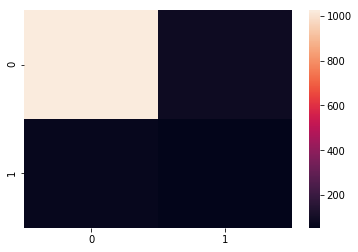

In [81]:
# Matriz de confusion
print(confusion_matrix(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test, y_pred2));